In [4]:
from sympy import *

# 已知文革后高校历年录取人数如右表，分别用二次及三次多项式：
# y = a0 + a1 * t + a2 * t**2
# y = b0 + b1 * t + b2 * t**2 + b3 * t**3
# t=[1977,1980,1990,2000,2008]
# y=[27, 40.2, 60.9, 221, 607.7]
# 拟合此数据，比较其拟合误差。

t=[1977,1980,1990,2000,2008]
A1 = Matrix(5,3, lambda i,j: t[i]**j)
A2 = Matrix(5,4, lambda i,j: t[i]**j)
B= Matrix([27, 30.2, 60.9, 221, 607.7])
A2
B

Matrix([
[   27],
[ 30.2],
[ 60.9],
[  221],
[607.7]])

In [9]:
X1 = A1.pinv()*B
X1

Matrix([
[  4028921.0968147],
[-4061.54061896043],
[ 1.02360541760627]])

In [10]:
X2 = A2.pinv()*B
X2

Matrix([
[ -284929511.584066],
[  430963.212704924],
[ -217.281463897636],
[0.0365161456333484]])

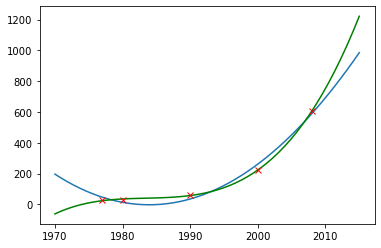

In [14]:
# 以上求得两个拟合方程
# 绘图查看拟合情况：
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1970,2015,50)
y1 = X1[0] + X1[1] * x + X1[2] * x**2
y2 = X2[0] + X2[1] * x + X2[2] * x**2 + X2[3] * x**3
plt.figure(1)
plt.plot(x,y1)
plt.plot(x,y2, color='green')

ptszip = zip( t , B )
pts = list(ptszip)

for i,j in pts:
    plt.plot(i,j, 'rx')
    # 'rx'表示红色×号点

plt.show()

In [17]:
# 通过求均方误差比较拟合精度
e1 = A1*X1 - B
norme1 = e1.norm()
norme1

57.3895639854554

In [19]:
e2 = A2*X2 - B
norme2 = e2.norm()
norme2

7.31938757236603

In [20]:
# 三次多项式拟合精度优于二次多项式

In [ ]:

# 这里我们发现用matlab计算伪逆时会出现警告
# 代码：
# t=[1977,1980,1990,2000,2008]';y=[27,30.2,60.9,221,607.7]'; 
# Aa=[ones(5,1),t,t.^2], alpha=inv(Aa'*Aa)*Aa'*y 
# Ab=[ones(5,1),t,t.^2,t.^3], beta=inv(Ab'*Ab)*Ab'*y
#
# 警告: 矩阵接近奇异值，或者缩放错误。结果可能不准确。RCOND =  3.622908e-23。 
# 警告: 矩阵接近奇异值，或者缩放错误。结果可能不准确。RCOND =  1.260634e-34。 
# 原题解里使用了改变时间起点，把 1970 年作为起点的方法解题，但sympy可以直接拿来计算使用。